In [190]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import math
from scipy.signal import butter, lfilter
from scipy.fftpack import fft, ifft
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import itertools
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange
from scipy import signal
import seaborn as sns
from numpy.random import permutation
from sklearn.svm import SVC  

In [3]:
fileName=['a01','a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20',
         'b01','b02','b03','b04','b05','c01','c02','c03','c04','c05','c06','c07','c08','c09','c10',
         'x01','x02','x03','x04','x05','x06','x07','x08','x09','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
mypath='C:/Users/sara/Documents/5anno/TESI/DataBase_PhysioNet/www.physionet.org/physiobank/database/apnea-ecg/'

In [4]:
def calcolaPSD(lista):
    lista=lista.tolist()
    for i in range (0,65536-len(lista)):
        lista.append(.0)
   # print(len(lista))
    dft= fft(lista)
    freq = np.fft.fftfreq(len(lista))
   
    PSD = np.abs(dft) ** 2
   # PSD=scipy.signal.periodogram(FFT)
    #magnitude=PSD[0]
   # print(len(PSD),'h')
    PSD64=[]
    for i in range (0,64):
        PSD64.append(statistics.mean(PSD[1024*i:1024*(i+1)]))

    return PSD64

In [5]:
def serial_corr(y1, lag):
    y2=np.roll(y1,lag)
   # m=statistics.mean(y1)
    #num=0
    #denom=0
    return np.corrcoef(y1,y2)[0,1]
    #for i in range(0,len(y1)):
     #   num+=(y1[i]-m)*(y2[i]-m)
      #  denom+=(y1[i]-m)**2
    #return num/denom

In [ ]:
def AT(rr,rr_time,k):
    count=[]
    while(j<rr_time[len(rr_time)-1]:
        while(i<len(rr_time) and rr_time[i]>=j*5 and rr_time[i]<=(j+1)*5):
            c+=1
            i+=1
        j+=1
        count.append(c)
        
    

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [167]:
def calcola_nn50v1(lista):
    lista=np.array(lista)
    #print(lista)
    count=0
    for i in range (0,len(lista)-2):
        if(lista[i+1]-lista[i]-50>0):
            count+=1
    return count

In [8]:
index=22
dfRR = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'RR.pkl')
dfEDR = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')
dfDivisione = pd.read_pickle( mypath+'DivisioneDB/'+fileName[index]+'divisione.pkl')
RR_intervals=dfRR['rr']

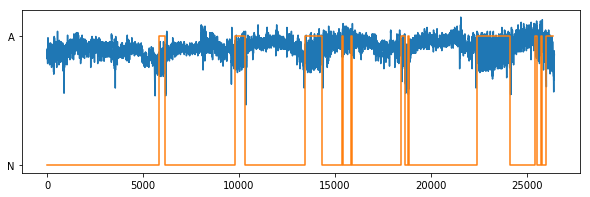

In [9]:
plt.figure(figsize=(10,3))

plt.plot(dfRR['time'],dfRR['rr'])
#plt.plot(dfEDR['time'],dfEDR['edr'])
plt.step(dfDivisione['time_apn'],dfDivisione['label'])

<Figure size 720x216 with 0 Axes>

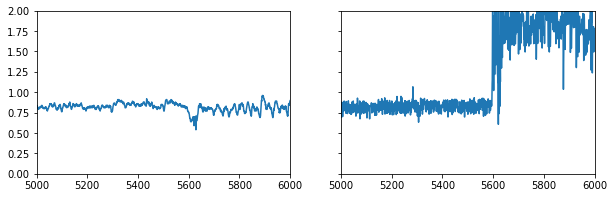

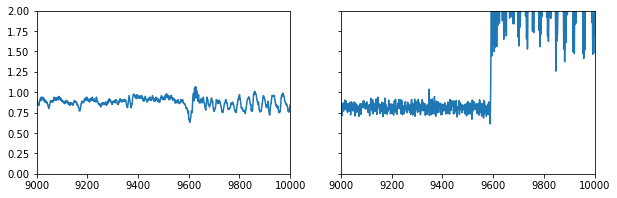

In [10]:
plt.figure(figsize=(10,3))
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(10, 3))
for i in range (0,2):
    ax[i].axis([5000,6000,0,2])
ax[0].plot(dfRR['time'],dfRR['rr'])
ax[1].plot(dfEDR['time'],dfEDR['edr'])
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(10, 3))
for i in range (0,2):
    ax[i].axis([9000,10000,0,2])
ax[0].plot(dfRR['time'],dfRR['rr'])
ax[1].plot(dfEDR['time'],dfEDR['edr'])

In [11]:
interbeat_diff=[]
for i in range (0,len(RR_intervals)-1):
    interbeat_diff.append(RR_intervals[i+1]-RR_intervals[i])

In [12]:
serial_corr(RR_intervals[:-1],1)

0.9611314174742325

In [13]:
y1=RR_intervals[:-1]
y2=y2=np.roll(y1,1)
np.corrcoef(y1,y2)[0,1]

0.9611314174742325

## Time domain Features

In [176]:
df_features_list=[]
db=[]
db_index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
for index in db_index:
    #index=0
    print(index)
    dfFeatures=pd.DataFrame()
    mediaRR=[]
    stdRR=[]
    mediaEDR=[]
    stdEDR=[]
    stdDIFF=[]
    rms=[]
    NN50v1=[]
    NN50v2=[]
    label=[]
    #db=[]
    sc1=[]
    sc2=[]
    sc3=[]
    sc4=[]
    sc5=[]

    #---------------------------LETTURA SEGNALI------------------------------
    dfRR = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'RR.pkl')
    dfEDR = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')
    dfDivisione = pd.read_pickle( mypath+'DivisioneDB/'+fileName[index]+'divisione.pkl')
    RR_intervals=dfRR['rr']
    interbeat_diff=[]
    for i in range (0,len(RR_intervals)-1):
        interbeat_diff.append(RR_intervals[i+1]-RR_intervals[i])
    EDR=dfEDR['edr']

    #----------------------------------ESTRAZIONE FEATURES-----------------------
    for i in range (0,len(dfDivisione)):
        durata=dfDivisione['stopEDRIndex'][i]-dfDivisione['startEDRIndex'][i]
        startRR=dfDivisione['startRRIndex'][i]
        stopRR=dfDivisione['stopRRIndex'][i]
        intervallo=RR_intervals[startRR:stopRR]
        if(durata<2):
            mediaRR.append(np.nan)
            mediaEDR.append(np.nan)
            stdRR.append(np.nan)
            stdEDR.append(np.nan)
            stdDIFF.append(np.nan)
            sc1.append(np.nan)
            sc2.append(np.nan)
            sc3.append(np.nan)
            sc4.append(np.nan)
            sc5.append(np.nan)
        else:
            mediaRR.append(statistics.mean(RR_intervals[startRR:stopRR]))
            mediaEDR.append(statistics.mean(EDR[dfDivisione['startEDRIndex'][i]:dfDivisione['stopEDRIndex'][i]]))
            stdRR.append(statistics.stdev(RR_intervals[startRR:stopRR]))
            stdEDR.append(statistics.stdev(EDR[dfDivisione['startEDRIndex'][i]:dfDivisione['stopEDRIndex'][i]]))
            stdDIFF.append(statistics.stdev(interbeat_diff[startRR:stopRR]))
            sc1.append(np.corrcoef(intervallo,np.roll(intervallo,1))[0,1])
            sc2.append(np.corrcoef(intervallo,np.roll(intervallo,2))[0,1])
            sc3.append(np.corrcoef(intervallo,np.roll(intervallo,3))[0,1])
            sc4.append(np.corrcoef(intervallo,np.roll(intervallo,4))[0,1])
            sc5.append(np.corrcoef(intervallo,np.roll(intervallo,5))[0,1])
            db.append(index)
        
        
        rms.append(np.sqrt(np.mean(RR_intervals[startRR:stopRR]**2)))
        NN50v1.append(calcola_nn50v1(RR_intervals[startRR:stopRR]))            
        #print('a')
        

        if (dfDivisione['label'][i]=='N'):
            label.append(0)
        else:
            label.append(1)
        
    #dfFeatures['db']=db
    dfFeatures['mediaRR']=mediaRR
    dfFeatures['mediaEDR']=mediaEDR
    dfFeatures['stdRR']=stdRR
    dfFeatures['stdEDR']=stdEDR
    dfFeatures['stdDIFF']=stdDIFF
    dfFeatures['rms']=rms
    dfFeatures['sc1']=sc1
    dfFeatures['sc2']=sc2
    dfFeatures['sc3']=sc3
    dfFeatures['sc4']=sc4
    dfFeatures['sc5']=sc5
    #dfFeatures['NN50v1']=NN50v1
    dfFeatures['label']=label
    
    dfFeatures=dfFeatures.dropna()
    df_features_list.append(dfFeatures)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [177]:
df_tot=pd.DataFrame()
for i in range(0,len(df_features_list)):
    df_tot=df_tot.append(df_features_list[i],ignore_index=True)

In [178]:
df_tot.columns

Index(['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'rms', 'sc1',
       'sc2', 'sc3', 'sc4', 'sc5', 'label'],
      dtype='object')

In [179]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
df_tot=df_tot.dropna()
scaled_values = scaler.fit_transform(df_tot) 
df_tot.loc[:,:] = scaled_values

In [180]:
df_tot['db']=db

## Frequency domain Features

In [281]:
edrInt=EDR[dfDivisione['startEDRIndex'][0]:dfDivisione['stopEDRIndex'][0]]

In [273]:
#CALCOLO LE FEATURES
df_features_list=[]
db_index=[0,1,2,3,4,5]
durata=[]
db=[]
label=[]
for index in db_index:
#index=0
    print(index)
    dfQRS = pd.read_pickle( mypath+'RR-EDR/'+fileName[index]+'RR.pkl')
    RR_intervals=dfQRS['rr']
    dfDivisione = pd.read_pickle( mypath+'DivisioneDB/'+fileName[index]+'divisione.pkl')
    dfEDR = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')
    EDR=dfEDR['edr']
    df_features=pd.DataFrame()
    #db=[]
    PSD=np.zeros((len(df),64))
    
    PSD_tot=[]
    for i in range(0,len(dfDivisione)):
            intervalloRR=np.array(RR_intervals[df['startRRIndex'][i]:df['stopRRIndex'][i]])
            intervalloEDR=np.array(EDR[df['startEDRIndex'][i]:df['stopEDRIndex'][i]])
            PSD64_RR=calcolaPSD(intervalloRR)
            PSD32_RR=PSD64_RR[0:31]
            
            PSD64_EDR=calcolaPSD(intervalloEDR)
            PSD32_EDR=PSD64_EDR[0:31]
            for k in range (0,31):
                PSD[i][k]=PSD32_RR[k]
            for k in range (32,63):
                PSD[i][k]=PSD32_EDR[k-32]
            db.append(index)
            if (dfDivisione['label'][i]=='N'):
                label.append(0)
            else:
                label.append(1)
        

    df_features['label']=label
    df_PSD=pd.DataFrame(PSD)
    df_features = pd.concat([df_features, df_PSD], axis=1, sort=False)
    df_features=df_features.dropna() 
    df_features_list.append(df_features)

0
1


KeyboardInterrupt: 

In [274]:
df_freq=pd.DataFrame()
for i in range(0,len(df_features_list)):
    df_freq=df_freq.append(df_features_list[i],ignore_index=True)

In [275]:
scaler = MinMaxScaler() 
df_freq=df_freq.dropna()
scaled_values = scaler.fit_transform(df_freq) 
df_freq.loc[:,:] = scaled_values
df_tot=df_freq

## FEATURE SELECTION

In [307]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
X = df_tot.iloc[:,0:30]
X = (X - X.mean()) / (X.std())  
y = np.array(df_tot.iloc[:,0])
X['label']=y
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X, y)
features=X.columns
for i in range(0,len(Selector_f.scores_)):
     print ('F-score: ',Selector_f.scores_[i], ' for feature ',features[i])

F-score:  -2.7415662731617942e+17  for feature  label
F-score:  51.16011534308528  for feature  0
F-score:  2.702739883747543  for feature  1
F-score:  2.864813401222123  for feature  2
F-score:  14.846383062389057  for feature  3
F-score:  7.79089182848968  for feature  4
F-score:  11.2381070871468  for feature  5
F-score:  12.389130415247175  for feature  6
F-score:  2.0959356555434203  for feature  7
F-score:  13.619567639076923  for feature  8
F-score:  4.8332874694623476  for feature  9
F-score:  2.6619079585878875  for feature  10
F-score:  1.3138391074223086  for feature  11
F-score:  8.739627854505576  for feature  12
F-score:  2.231214402131211  for feature  13
F-score:  0.4274939503861066  for feature  14
F-score:  0.8701617053941739  for feature  15
F-score:  1.8175977416799938  for feature  16
F-score:  7.339086185532093  for feature  17
F-score:  2.1555736451720233  for feature  18
F-score:  7.210244631400139  for feature  19
F-score:  6.008580501720343  for feature  20
F-

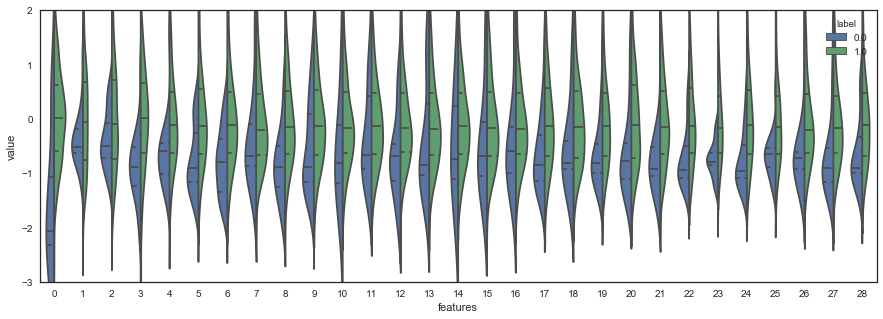

In [308]:
plt.figure(figsize=(15,5))
data = pd.melt(X,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.axis([9,10000,-3,2])
sns.violinplot(x="features", y="value", hue="label", data=data,split=True, inner="quart")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

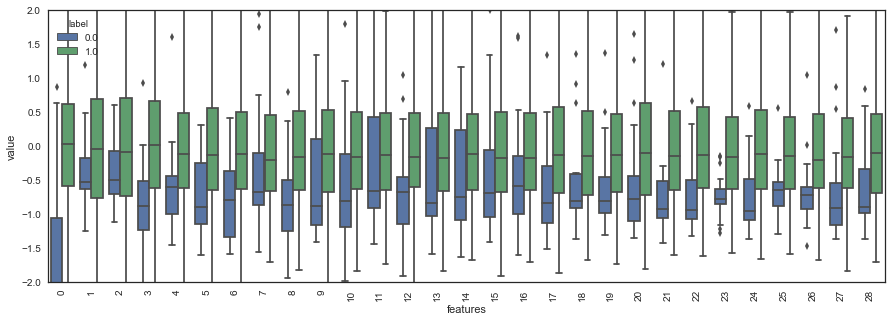

In [309]:
plt.figure(figsize=(15,5))
plt.axis([9,10000,-2,2])
sns.boxplot(x="features", y="value", hue="label", data=data)
plt.xticks(rotation=90)

In [310]:
sns.jointplot(X.loc[:,36], X.loc[:,37], kind="regg", color="#ce1414")

KeyError: 'the label [36] is not in the [columns]'

C:\Users\sara\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\sara\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\sara\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


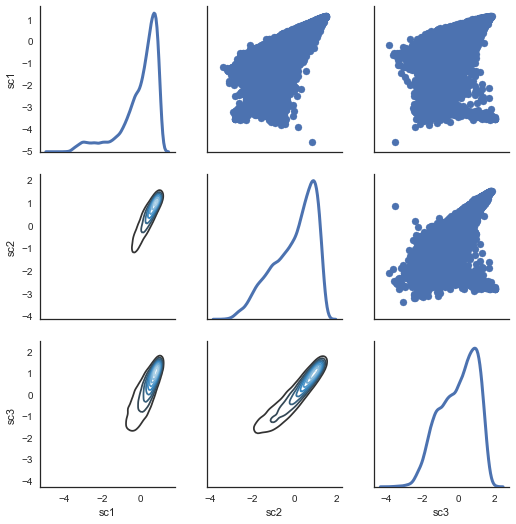

In [185]:
sns.set(style="white")
df = X.loc[:,['sc1','sc2','sc3']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

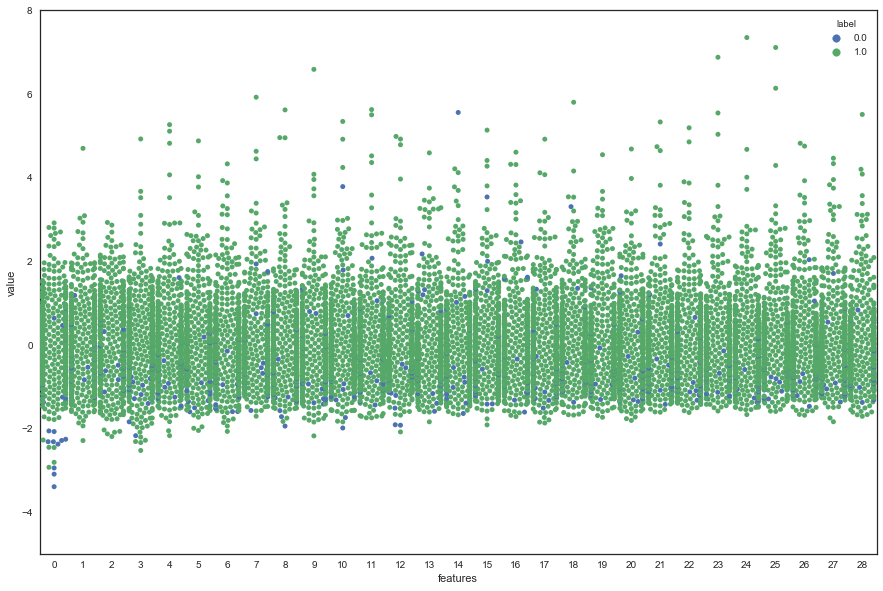

In [311]:
plt.figure(figsize=(15,10))
plt.axis([9,10000,-5,8])
sns.swarmplot(x="features", y="value", hue="label", data=data)

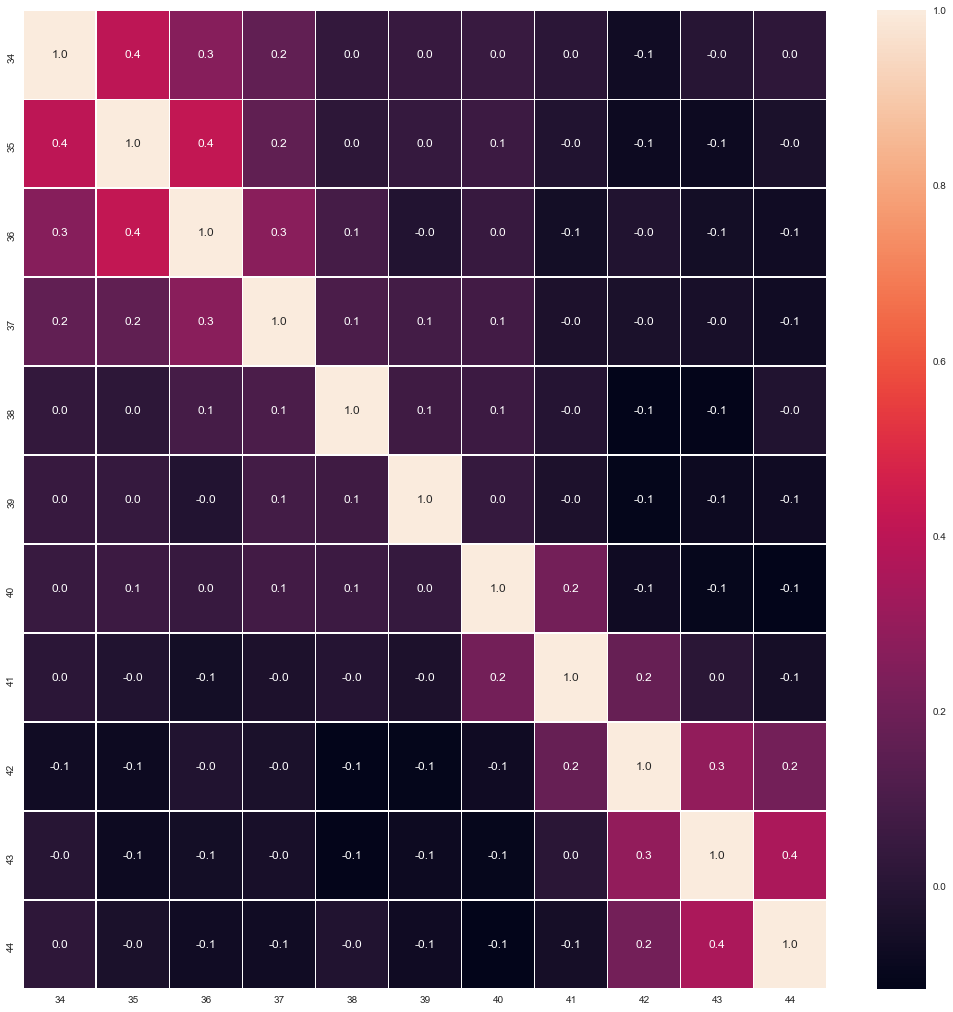

In [296]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.iloc[:,0:11].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Rnadom forest con tutte le features

Accuracy is:  0.9591836734693877
Sensitivity :  0.0
Specificity :  0.9657534246575342


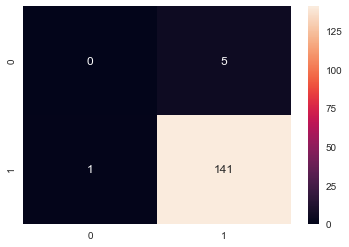

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X.iloc[:,0:11], y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=60)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
sensitivity1 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity1)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clr_rf, X.iloc[:,0:11], y, cv=5)


In [298]:
scores

array([0.94897959, 0.95918367, 0.94897959, 0.93877551, 0.96907216])

# Tengo le features che non sono correlate tra loro

In [205]:
drop_list1 = ['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'sc3', 'label']
x_1 = X[drop_list1] 
x_train, x_test, y_train, y_test = train_test_split(x_1.iloc[:,0:6], y, test_size=0.3, random_state=42)

In [223]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# find best scored 5 features
select_feature = SelectKBest(f_classif, k=3).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [   4.63892111   10.27101951    4.38504281    7.700254     62.83624892
    4.91683984 1877.51389081 3259.04605843 3464.44370336 2107.21753792
 1290.72142802]
Feature list: Index(['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'rms', 'sc1',
       'sc2', 'sc3', 'sc4', 'sc5'],
      dtype='object')


Accuracy is:  0.7083906464924347
Sensitivity :  0.7348353552859619
Specificity :  0.652120467117394


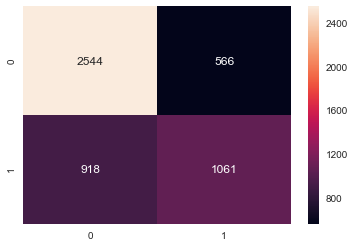

In [224]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=60)      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))

print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")
sensitivity1 = cm_2[0,0]/(cm_2[0,0]+cm_2[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm_2[1,1]/(cm_2[1,1]+cm_2[0,1])
print('Specificity : ', specificity1)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clr_rf_2, X.iloc[:,0:11], y, cv=5)

## CLASSIFICATION

In [148]:
df_tot = pd.concat([df_freq, df_tot], axis=1, sort=False)

In [283]:
random_indices = permutation(df_tot.index)
# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(df_tot)*0.3)
# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = df_tot.loc[random_indices[1:test_cutoff]]
# Generate the train set with YYYYYthe rest of the data.
train = df_tot.loc[random_indices[test_cutoff:]]

#train,test= train_test_split(df_a, test_size=0.3, random_state=42)

In [284]:
df_tot.columns


Index(['mediaRR', 'mediaEDR', 'stdRR', 'stdEDR', 'stdDIFF', 'rms', 'sc1',
       'sc2', 'sc3', 'sc4', 'sc5', 'label', 'db'],
      dtype='object')

In [285]:
#train1=df_tot[df_tot['db']<10]
#train2=df_tot[df_tot['db']>30]
#train = pd.concat([train1, train2], sort=False)
#test = df_tot[df_tot['db']==22]


In [339]:
x_columns = [ 'sc1',
       'sc2', 'sc3', 'sc4', 'sc5']
y_column = ['label']

F-score:  1840.8053276925787  for feature  mediaRR
F-score:  3179.7400724015474  for feature  mediaEDR
F-score:  3412.8360695521387  for feature  stdRR
F-score:  2108.7414867534503  for feature  stdEDR
F-score:  1288.5883962275454  for feature  stdDIFF


C:\Users\sara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [341]:
from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=1)
# Fit the model on the training data.
classifier=knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

y_pred = classifier.fit(train[x_columns], train[y_column]).predict(test[x_columns])
for i in range(0,len(y_pred)):
    y_pred[i]=math.floor(y_pred[i])

In [342]:
cnf_matrix = confusion_matrix(test[y_column]['label'], y_pred)

In [343]:
cnf_matrix

array([[2294,  841],
       [ 812, 1140]], dtype=int64)

Confusion matrix, without normalization
[[2294  841]
 [ 812 1140]]


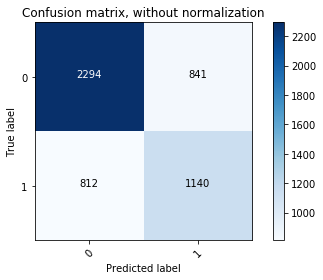

In [344]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.73173844 0.26826156]
 [0.41598361 0.58401639]]


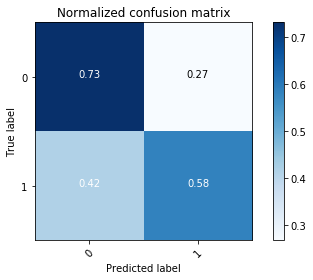

In [345]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True,
                      title='Normalized confusion matrix')

In [346]:
from sklearn.metrics import classification_report
print(classification_report(test[y_column], y_pred))  

             precision    recall  f1-score   support

        0.0       0.74      0.73      0.74      3135
        1.0       0.58      0.58      0.58      1952

avg / total       0.68      0.68      0.68      5087



In [347]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
y_pred = svclassifier.fit(train[x_columns], train[y_column]).predict(test[x_columns])  
for i in range(0,len(y_pred)):
    y_pred[i]=math.floor(y_pred[i])

C:\Users\sara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [348]:
cnf_matrix = confusion_matrix(test[y_column]['label'], y_pred)

In [349]:
cnf_matrix

array([[2243,  892],
       [ 447, 1505]], dtype=int64)

Confusion matrix, without normalization
[[2243  892]
 [ 447 1505]]


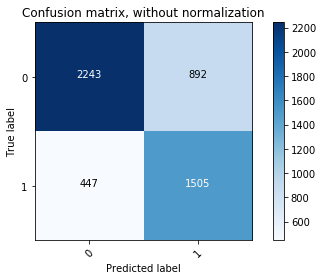

In [350]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.71547049 0.28452951]
 [0.2289959  0.7710041 ]]


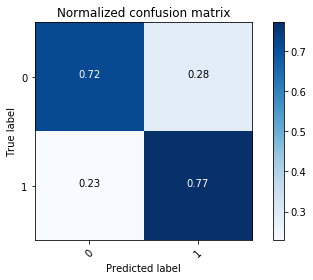

In [351]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True,
                      title='Normalized confusion matrix')

In [352]:
from sklearn.metrics import classification_report
print(classification_report(test[y_column], y_pred))  

             precision    recall  f1-score   support

        0.0       0.83      0.72      0.77      3135
        1.0       0.63      0.77      0.69      1952

avg / total       0.75      0.74      0.74      5087



In [353]:
from sklearn.metrics import classification_report
print(classification_report(test[y_column], y_pred))  

             precision    recall  f1-score   support

        0.0       0.83      0.72      0.77      3135
        1.0       0.63      0.77      0.69      1952

avg / total       0.75      0.74      0.74      5087

